#### hello boys

In [51]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import holidays

In [52]:
df=pd.read_csv('./data/dehli_energy.csv')
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393440 entries, 0 to 393439
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    393440 non-null  int64  
 1   datetime      393440 non-null  object 
 2   Power demand  393440 non-null  float64
 3   temp          393440 non-null  float64
 4   dwpt          393440 non-null  float64
 5   rhum          393440 non-null  float64
 6   wdir          392900 non-null  float64
 7   wspd          393440 non-null  float64
 8   pres          393440 non-null  float64
 9   year          393440 non-null  int64  
 10  month         393440 non-null  int64  
 11  day           393440 non-null  int64  
 12  hour          393440 non-null  int64  
 13  minute        393440 non-null  int64  
 14  moving_avg_3  393438 non-null  float64
dtypes: float64(8), int64(6), object(1)
memory usage: 45.0+ MB


In [54]:
df.describe()   

,Unnamed: 0,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
count,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,392900.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393438.000000
mean,196719.500000,3960.736469,25.527913,16.338046,63.435767,163.777081,7.854550,1008.932695,2022.487129,6.446991,15.745171,11.184371,27.354959,3960.746273
std,113576.489292,1300.473773,7.981563,7.377440,24.850663,116.888397,5.664314,6.902759,1.110587,3.412654,8.783091,6.797501,17.223877,1299.545642
min,0.000000,1302.080000,4.000000,-8.600000,5.000000,0.000000,0.000000,989.600000,2021.000000,1.000000,1.000000,0.000000,0.000000,1307.680000
25%,98359.750000,3074.900000,20.000000,10.400000,44.000000,50.000000,5.400000,1003.000000,2021.000000,3.000000,8.000000,5.000000,10.000000,3075.861667
50%,196719.500000,3832.320000,27.000000,15.400000,67.000000,160.000000,7.600000,1009.000000,2022.000000,6.000000,16.000000,11.000000,25.000000,3831.728333
75%,295079.250000,4870.465000,31.000000,23.900000,84.000000,270.000000,11.200000,1015.000000,2023.000000,9.000000,23.000000,17.000000,40.000000,4869.906667
max,393439.000000,8631.530000,46.400000,30.300000,100.000000,360.000000,63.000000,1027.000000,2024.000000,12.000000,31.000000,23.000000,55.000000,8598.126667


In [55]:
df.isnull().sum()   

Unnamed: 0        0
datetime          0
Power demand      0
temp              0
dwpt              0
rhum              0
wdir            540
wspd              0
pres              0
year              0
month             0
day               0
hour              0
minute            0
moving_avg_3      2
dtype: int64

In [56]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [57]:
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [58]:
df = df.groupby(df["datetime"].dt.floor("H")).agg({
    "Power demand": "sum",  
    "temp": "mean"
}).reset_index()

df["datetime"] = df["datetime"].dt.strftime("%Y-%m-%d %H:00")

df["datetime"] = pd.to_datetime(df["datetime"])  # back to datetime for extraction
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["date"] = df["datetime"].dt.day
df["day"] = df["datetime"].dt.dayofweek


/tmp/ipykernel_6883/245227638.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.groupby(df["datetime"].dt.floor("H")).agg({


In [59]:
df.isnull().sum()

datetime        0
Power demand    0
temp            0
year            0
month           0
date            0
day             0
dtype: int64

In [60]:
df.head()

,datetime,Power demand,temp,year,month,date,day
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4


In [61]:
df["is_weekend"] = df["day"].apply(lambda x: 1 if x in [5, 6] else 0)

In [62]:
df.head()

,datetime,Power demand,temp,year,month,date,day,is_weekend
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4,0
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4,0
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4,0
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4,0
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4,0


In [63]:
indian_holidays = holidays.India(years=range(2021,2024))

# Create a new column indicating holiday or not
df["is_holiday"] = df["datetime"].dt.date.isin(indian_holidays)
df["is_holiday"] = df["is_holiday"].apply(lambda x: 1 if x else 0)

print(df.head(50).columns)

Index(['datetime', 'Power demand', 'temp', 'year', 'month', 'date', 'day',
       'is_weekend', 'is_holiday'],
      dtype='object')


In [64]:
df_demo = df[(df["year"] == 2021) & (df["month"] == 1) & (df["date"] == 26)]
df_demo.head()

,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday
599,2021-01-26 00:00:00,24259.05,10.5,2021,1,26,1,0,1
600,2021-01-26 01:00:00,21242.33,9.5,2021,1,26,1,0,1
601,2021-01-26 02:00:00,19843.96,9.1,2021,1,26,1,0,1
602,2021-01-26 03:00:00,19192.37,9.1,2021,1,26,1,0,1
603,2021-01-26 04:00:00,19808.41,8.5,2021,1,26,1,0,1


In [65]:
df_2021 = df[(df["year"] == 2021)]
monthly_df_2021 = df_2021.groupby(by="month").agg({
    "Power demand": "sum",
    "temp": "mean"  
}).reset_index()
monthly_df_2021

,month,Power demand,temp
0,1,28851854.54,12.867139
1,2,22293879.30,18.596414
2,3,27154671.14,24.816944
3,4,25838875.32,29.222153
4,5,27184997.88,30.552868
5,6,34513677.93,32.206883
6,7,33094883.97,31.681422
7,8,36513004.46,30.375448
8,9,32455879.90,28.624253
9,10,27175182.48,26.241963


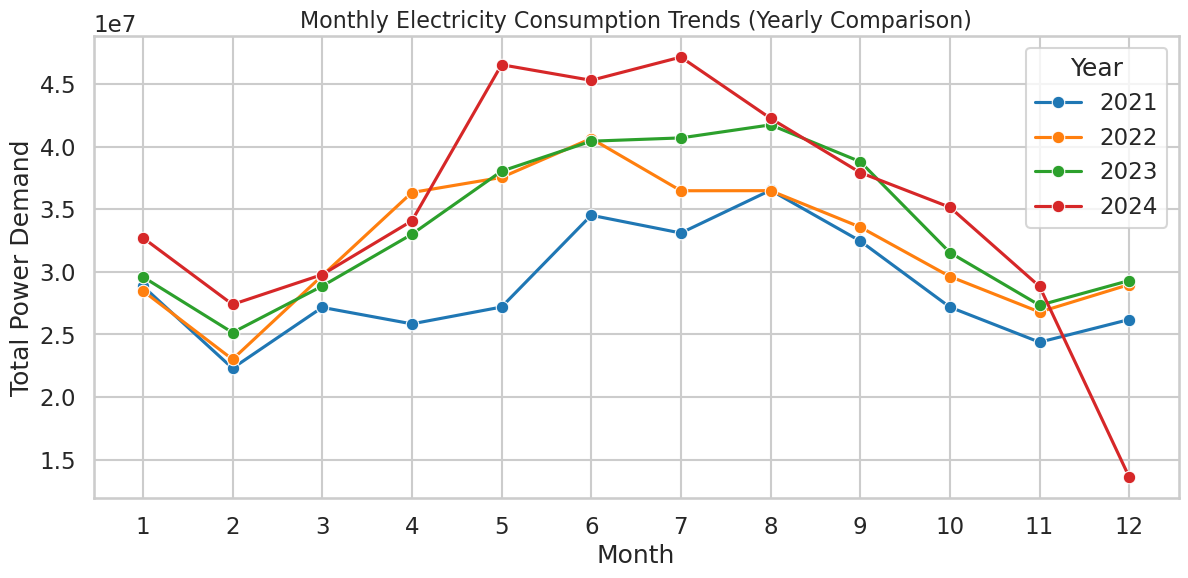

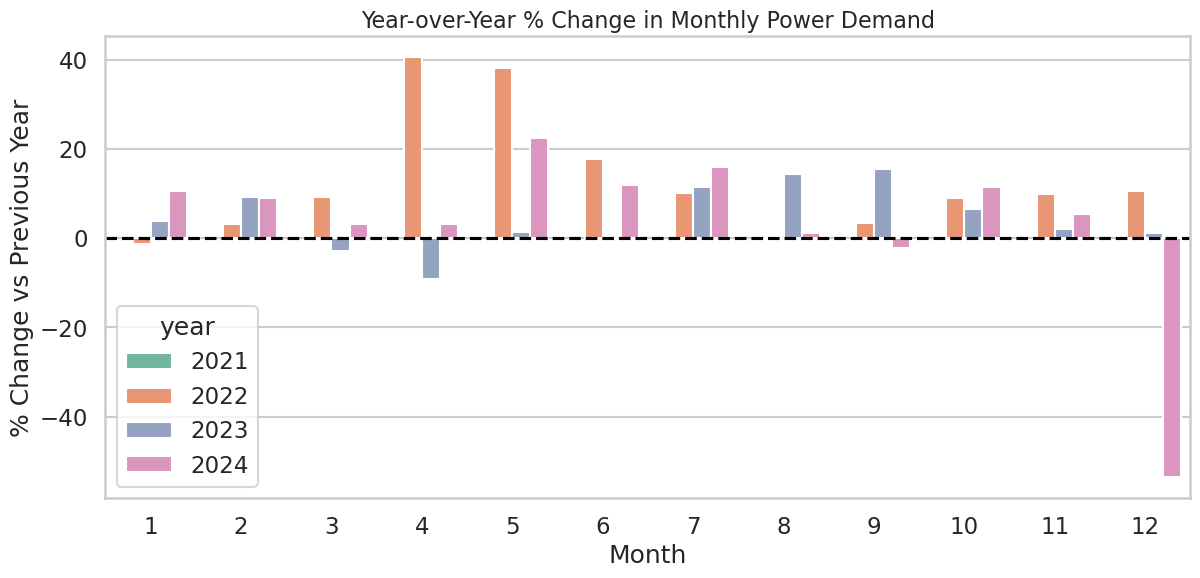

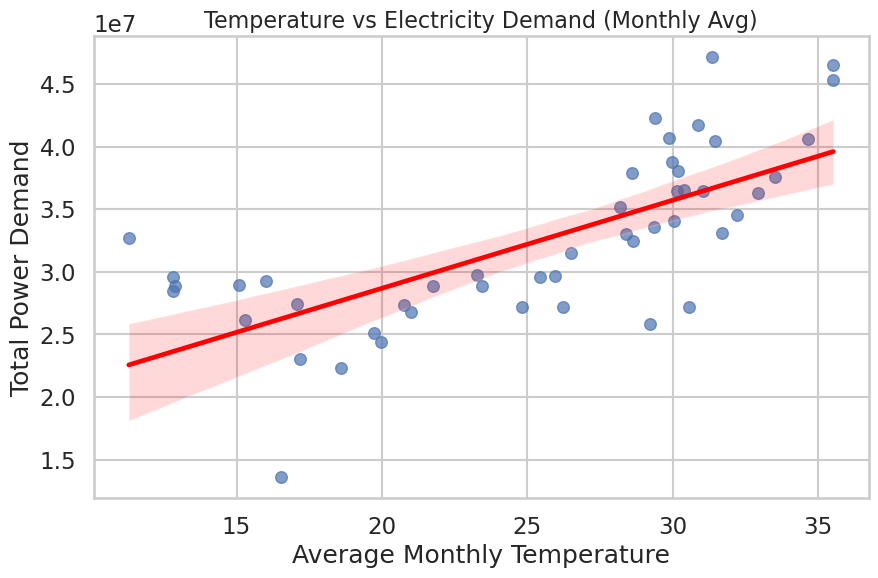

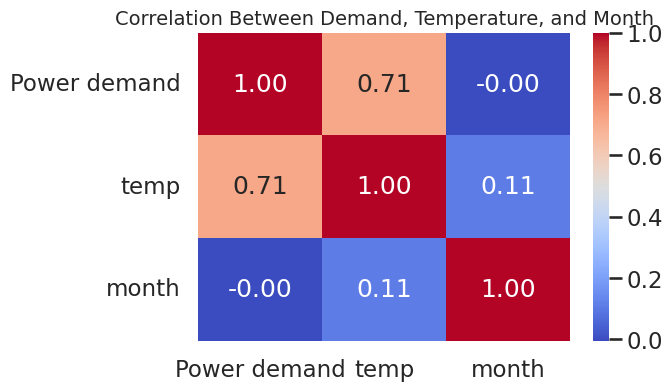

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# 📌 Setup
sns.set(style="whitegrid", context="talk")

# --- 1️⃣ Group data by year + month ---
monthly_df = (
    df.groupby(["year", "month"])
    .agg({
        "Power demand": "sum",
        "temp": "mean"
    })
    .reset_index()
)

# --- 2️⃣ Line plot: Monthly consumption trends ---
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_df,
    x="month", y="Power demand", hue="year", marker="o", palette="tab10"
)
plt.title("Monthly Electricity Consumption Trends (Yearly Comparison)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Power Demand")
plt.legend(title="Year")
plt.xticks(range(1, 13))
plt.show()

# --- 4️⃣ YoY % change per month ---
monthly_df["pct_change"] = monthly_df.groupby("month")["Power demand"].pct_change() * 100
plt.figure(figsize=(14, 6))
sns.barplot(
    data=monthly_df, x="month", y="pct_change", hue="year", palette="Set2"
)
plt.title("Year-over-Year % Change in Monthly Power Demand", fontsize=16)
plt.xlabel("Month")
plt.ylabel("% Change vs Previous Year")
plt.axhline(0, color="black", linestyle="--")
plt.show()

# --- 7️⃣ Temperature vs Demand correlation ---
plt.figure(figsize=(10, 6))
sns.regplot(
    data=monthly_df, x="temp", y="Power demand", scatter_kws={"s": 70, "alpha": 0.7},
    line_kws={"color": "red"}
)
plt.title("Temperature vs Electricity Demand (Monthly Avg)", fontsize=16)
plt.xlabel("Average Monthly Temperature")
plt.ylabel("Total Power Demand")
plt.show()

# --- 8️⃣ Correlation heatmap (temp vs demand vs month) ---
corr = monthly_df[["Power demand", "temp", "month"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Demand, Temperature, and Month", fontsize=14)
plt.show()

In [67]:
# ===== ADVANCED FEATURE ENGINEERING FOR BETTER PREDICTION ACCURACY =====

# 1. Create time-based features
df['hour'] = df['datetime'].dt.hour
df['quarter'] = df['datetime'].dt.quarter
df['week_of_year'] = df['datetime'].dt.isocalendar().week

# 2. Create cyclical features (important for time series)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# 3. Lag features (previous values impact current demand)
df = df.sort_values('datetime').reset_index(drop=True)
for lag in [1, 2, 3, 6, 12, 24, 168]:  # 1h, 2h, 3h, 6h, 12h, 1day, 1week lags
    df[f'power_lag_{lag}'] = df['Power demand'].shift(lag)
    df[f'temp_lag_{lag}'] = df['temp'].shift(lag)

# 4. Rolling statistics (trend and seasonality indicators)
for window in [3, 6, 12, 24, 168]:  # 3h, 6h, 12h, 1day, 1week windows
    df[f'power_rolling_mean_{window}'] = df['Power demand'].rolling(window=window, min_periods=1).mean()
    df[f'power_rolling_std_{window}'] = df['Power demand'].rolling(window=window, min_periods=1).std()
    df[f'temp_rolling_mean_{window}'] = df['temp'].rolling(window=window, min_periods=1).mean()

# 5. Interaction features
df['temp_hour_interaction'] = df['temp'] * df['hour']
df['temp_weekend_interaction'] = df['temp'] * df['is_weekend']
df['temp_holiday_interaction'] = df['temp'] * df['is_holiday']

# 6. Peak hours indicators
df['is_peak_morning'] = ((df['hour'] >= 7) & (df['hour'] <= 10)).astype(int)
df['is_peak_evening'] = ((df['hour'] >= 18) & (df['hour'] <= 22)).astype(int)
df['is_peak_hours'] = (df['is_peak_morning'] | df['is_peak_evening']).astype(int)

# 7. Temperature categories
df['temp_category'] = pd.cut(df['temp'], 
                           bins=[-np.inf, 10, 20, 30, 40, np.inf], 
                           labels=['very_cold', 'cold', 'moderate', 'hot', 'very_hot'])
df = pd.get_dummies(df, columns=['temp_category'], prefix='temp')

print(f"Dataset shape after feature engineering: {df.shape}")
print(f"New features created: {df.shape[1] - 9} additional features")  # Original had 9 columns
df.head()

Dataset shape after feature engineering: (33074, 58)
New features created: 49 additional features


,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday,hour,...,temp_weekend_interaction,temp_holiday_interaction,is_peak_morning,is_peak_evening,is_peak_hours,temp_very_cold,temp_cold,temp_moderate,temp_hot,temp_very_hot
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4,0,0,0,...,0.0,0.0,0,0,0,True,False,False,False,False
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4,0,0,1,...,0.0,0.0,0,0,0,True,False,False,False,False
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4,0,0,2,...,0.0,0.0,0,0,0,True,False,False,False,False
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4,0,0,3,...,0.0,0.0,0,0,0,True,False,False,False,False
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4,0,0,4,...,0.0,0.0,0,0,0,True,False,False,False,False


In [68]:
df.columns

Index(['datetime', 'Power demand', 'temp', 'year', 'month', 'date', 'day',
       'is_weekend', 'is_holiday', 'hour', 'quarter', 'week_of_year',
       'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
       'power_lag_1', 'temp_lag_1', 'power_lag_2', 'temp_lag_2', 'power_lag_3',
       'temp_lag_3', 'power_lag_6', 'temp_lag_6', 'power_lag_12',
       'temp_lag_12', 'power_lag_24', 'temp_lag_24', 'power_lag_168',
       'temp_lag_168', 'power_rolling_mean_3', 'power_rolling_std_3',
       'temp_rolling_mean_3', 'power_rolling_mean_6', 'power_rolling_std_6',
       'temp_rolling_mean_6', 'power_rolling_mean_12', 'power_rolling_std_12',
       'temp_rolling_mean_12', 'power_rolling_mean_24', 'power_rolling_std_24',
       'temp_rolling_mean_24', 'power_rolling_mean_168',
       'power_rolling_std_168', 'temp_rolling_mean_168',
       'temp_hour_interaction', 'temp_weekend_interaction',
       'temp_holiday_interaction', 'is_peak_morning', 'is_peak_evening',
       

## 📊 Understanding Key Time Series Features

### 1. **Power Lag Features** (`power_lag_1`, `power_lag_2`, etc.)
- **What it is**: Previous values of power demand from 1, 2, 3, 6, 12, 24, and 168 hours ago
- **Why important**: Energy demand has strong **autocorrelation** - current demand depends heavily on recent past demand
- **Example**: If power demand was high 1 hour ago, it's likely to be high now too
- **Business logic**: People's energy usage patterns are predictable (work hours, sleep cycles, etc.)

### 2. **Power Rolling Mean** (`power_rolling_mean_3`, `power_rolling_mean_24`, etc.)
- **What it is**: Average power demand over the last 3, 6, 12, 24, or 168 hours
- **Why important**: Captures **trends** and smooths out short-term fluctuations
- **Example**: `power_rolling_mean_24` = average demand over last 24 hours (daily pattern)
- **Business logic**: Helps identify if we're in a high-demand period or low-demand period

### 3. **Power Rolling Std** (`power_rolling_std_3`, `power_rolling_std_24`, etc.)
- **What it is**: Standard deviation (volatility) of power demand over rolling windows
- **Why important**: Measures **variability** - some periods have stable demand, others are volatile
- **Example**: High std = unpredictable demand, Low std = stable demand
- **Business logic**: Helps model uncertainty and peak/off-peak variations

### 4. **Why These Features Boost Accuracy**
- **Capture temporal patterns**: Daily, weekly, seasonal cycles
- **Reduce noise**: Rolling averages smooth out random fluctuations  
- **Provide context**: Current value + historical context = better prediction
- **Handle seasonality**: Different patterns for weekdays/weekends, seasons, etc.

=== FEATURE COMPARISON FOR 2021-01-15 (First 10 hours) ===
               datetime  Power demand  power_lag_1  power_lag_24  \
335 2021-01-15 00:00:00      24356.60     29601.83      24806.37   
336 2021-01-15 01:00:00      21445.69     24356.60      21661.43   
337 2021-01-15 02:00:00      19992.22     21445.69      20161.22   
338 2021-01-15 03:00:00      19382.18     19992.22      19596.88   
339 2021-01-15 04:00:00      20170.61     19382.18      20488.33   
340 2021-01-15 05:00:00      23585.28     20170.61      24488.88   
341 2021-01-15 06:00:00      31367.95     23585.28      32782.11   
342 2021-01-15 07:00:00      41858.43     31367.95      43792.07   
343 2021-01-15 08:00:00      49569.95     41858.43      51982.72   
344 2021-01-15 09:00:00      55023.52     49569.95      55614.63   

     power_rolling_mean_24  power_rolling_std_24  
335               38813.00              11968.20  
336               38804.02              11981.71  
337               38796.97             

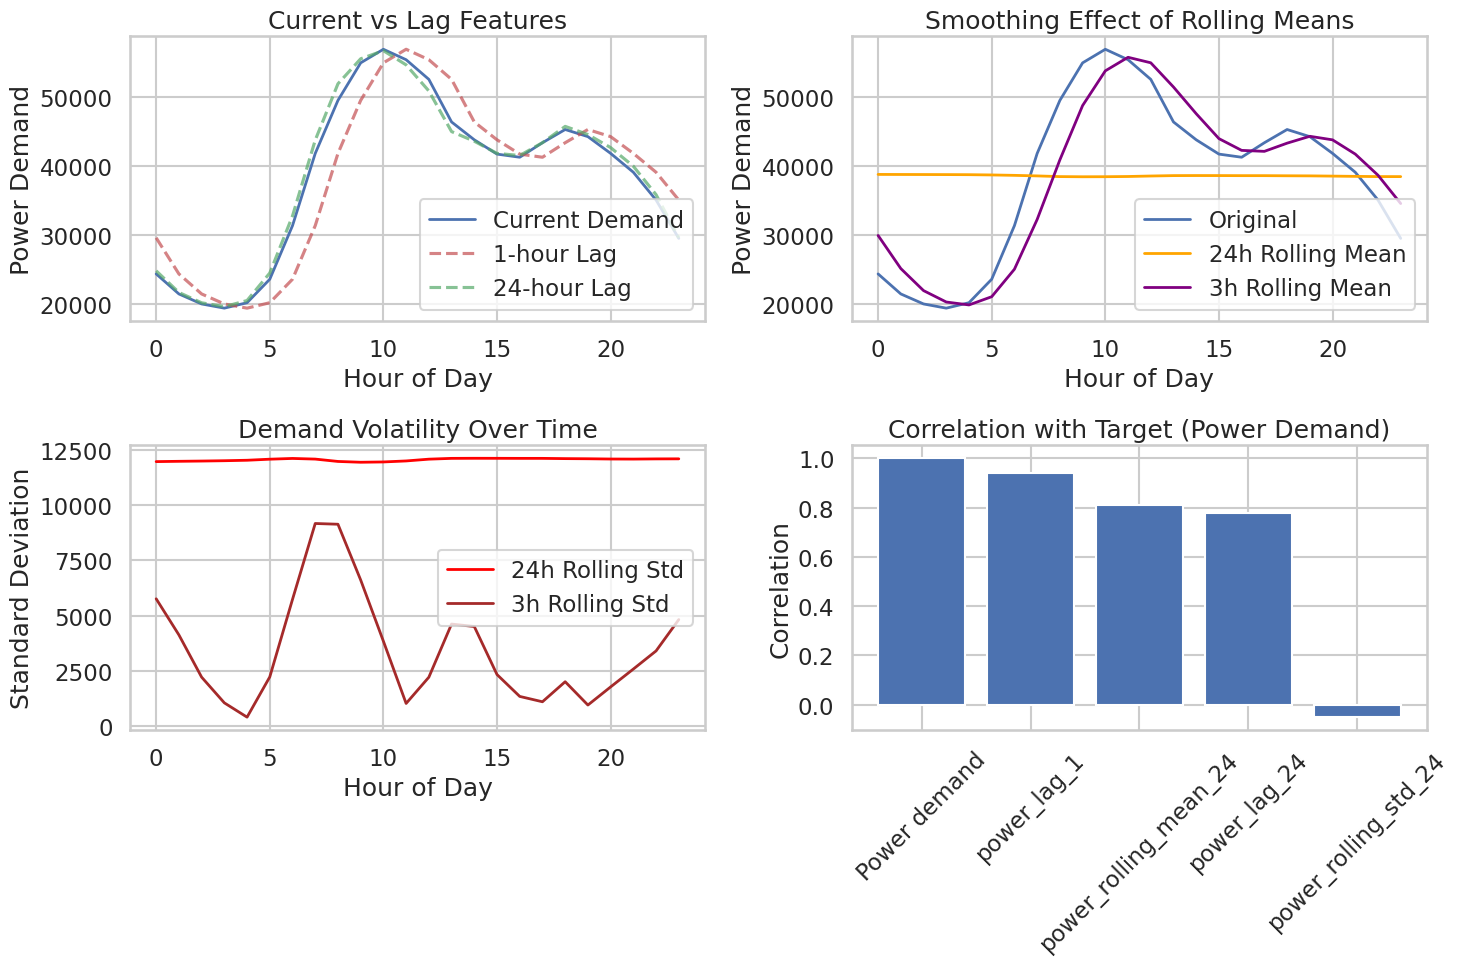


=== CORRELATION WITH TARGET ===
Power demand             1.000
power_lag_1              0.940
power_rolling_mean_24    0.812
power_lag_24             0.779
power_rolling_std_24    -0.051
Name: Power demand, dtype: float64


In [69]:
# ===== PRACTICAL EXAMPLE: Understanding Lag and Rolling Features =====

# Let's look at a specific time period to understand these features
example_data = df[df['datetime'].dt.date == pd.to_datetime('2021-01-15').date()].copy()

# Create a comparison DataFrame showing original vs engineered features
comparison_df = example_data[['datetime', 'Power demand', 'power_lag_1', 'power_lag_24', 
                             'power_rolling_mean_24', 'power_rolling_std_24']].head(10)

print("=== FEATURE COMPARISON FOR 2021-01-15 (First 10 hours) ===")
print(comparison_df.round(2))

print("\n=== INTERPRETATION ===")
print("• power_lag_1: Power demand 1 hour ago")
print("• power_lag_24: Power demand 24 hours ago (same time yesterday)")
print("• power_rolling_mean_24: Average demand over last 24 hours")
print("• power_rolling_std_24: Volatility of demand over last 24 hours")

# Visualize the relationship
plt.figure(figsize=(15, 10))

# Plot 1: Original vs Lag features
plt.subplot(2, 2, 1)
plt.plot(example_data['hour'], example_data['Power demand'], 'b-', label='Current Demand', linewidth=2)
plt.plot(example_data['hour'], example_data['power_lag_1'], 'r--', label='1-hour Lag', alpha=0.7)
plt.plot(example_data['hour'], example_data['power_lag_24'], 'g--', label='24-hour Lag', alpha=0.7)
plt.title('Current vs Lag Features')
plt.xlabel('Hour of Day')
plt.ylabel('Power Demand')
plt.legend()
plt.grid(True)

# Plot 2: Rolling mean smoothing effect
plt.subplot(2, 2, 2)
plt.plot(example_data['hour'], example_data['Power demand'], 'b-', label='Original', linewidth=2)
plt.plot(example_data['hour'], example_data['power_rolling_mean_24'], 'orange', label='24h Rolling Mean', linewidth=2)
plt.plot(example_data['hour'], example_data['power_rolling_mean_3'], 'purple', label='3h Rolling Mean', linewidth=2)
plt.title('Smoothing Effect of Rolling Means')
plt.xlabel('Hour of Day')
plt.ylabel('Power Demand')
plt.legend()
plt.grid(True)

# Plot 3: Rolling standard deviation (volatility)
plt.subplot(2, 2, 3)
plt.plot(example_data['hour'], example_data['power_rolling_std_24'], 'red', label='24h Rolling Std', linewidth=2)
plt.plot(example_data['hour'], example_data['power_rolling_std_3'], 'brown', label='3h Rolling Std', linewidth=2)
plt.title('Demand Volatility Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)

# Plot 4: Correlation with target
plt.subplot(2, 2, 4)
correlations = df[['Power demand', 'power_lag_1', 'power_lag_24', 'power_rolling_mean_24', 'power_rolling_std_24']].corr()['Power demand'].sort_values(ascending=False)
plt.bar(range(len(correlations)), correlations.values)
plt.xticks(range(len(correlations)), correlations.index, rotation=45)
plt.title('Correlation with Target (Power Demand)')
plt.ylabel('Correlation')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\n=== CORRELATION WITH TARGET ===")
print(correlations.round(3))

## 🕐 What is 24-Hour Rolling Mean?

### **Simple Definition:**
The **24-hour rolling mean** is the **average power demand over the last 24 hours** at any given time.

### **Think of it like this:**
- At 3 PM today, the 24h rolling mean = average demand from 3 PM yesterday to 3 PM today
- At 4 PM today, the 24h rolling mean = average demand from 4 PM yesterday to 4 PM today  
- The "window" of 24 hours keeps **rolling** forward with each new hour

### **Why 24 hours specifically?**
- Captures a full daily cycle (morning peak, afternoon, evening peak, night)
- Smooths out hourly fluctuations but preserves daily patterns
- Tells us: "Are we in a high-demand day or low-demand day overall?"

### **Real-world analogy:**
Imagine you're tracking your daily expenses:
- **Raw expense**: What you spent this hour ($50 lunch)
- **24h rolling mean**: Your average hourly spending over the last 24 hours ($12/hour)
- The rolling mean gives you context - is $50 normal for your daily pattern or unusually high?

=== SAMPLE DATA (30 hours) ===
             datetime  Power demand
0 2021-01-13 13:00:00      46070.13
1 2021-01-13 14:00:00      43967.41
2 2021-01-13 15:00:00      42265.59
3 2021-01-13 16:00:00      41417.42
4 2021-01-13 17:00:00      43553.97
5 2021-01-13 18:00:00      46432.04
6 2021-01-13 19:00:00      45054.43
7 2021-01-13 20:00:00      42176.65
8 2021-01-13 21:00:00      39248.12
9 2021-01-13 22:00:00      35586.09

=== HOW 24-HOUR ROLLING MEAN WORKS ===
Row 0 (1st hour): Rolling mean = average of hour 0 only =  46070.13
Row 1 (2nd hour): Rolling mean = average of hours 0-1 =  45018.77
Row 23 (24th hour): Rolling mean = average of hours 0-23 =  38901.93
Row 24 (25th hour): Rolling mean = average of hours 1-24 =  38858.92
Row 25 (26th hour): Rolling mean = average of hours 2-25 =  38845.11


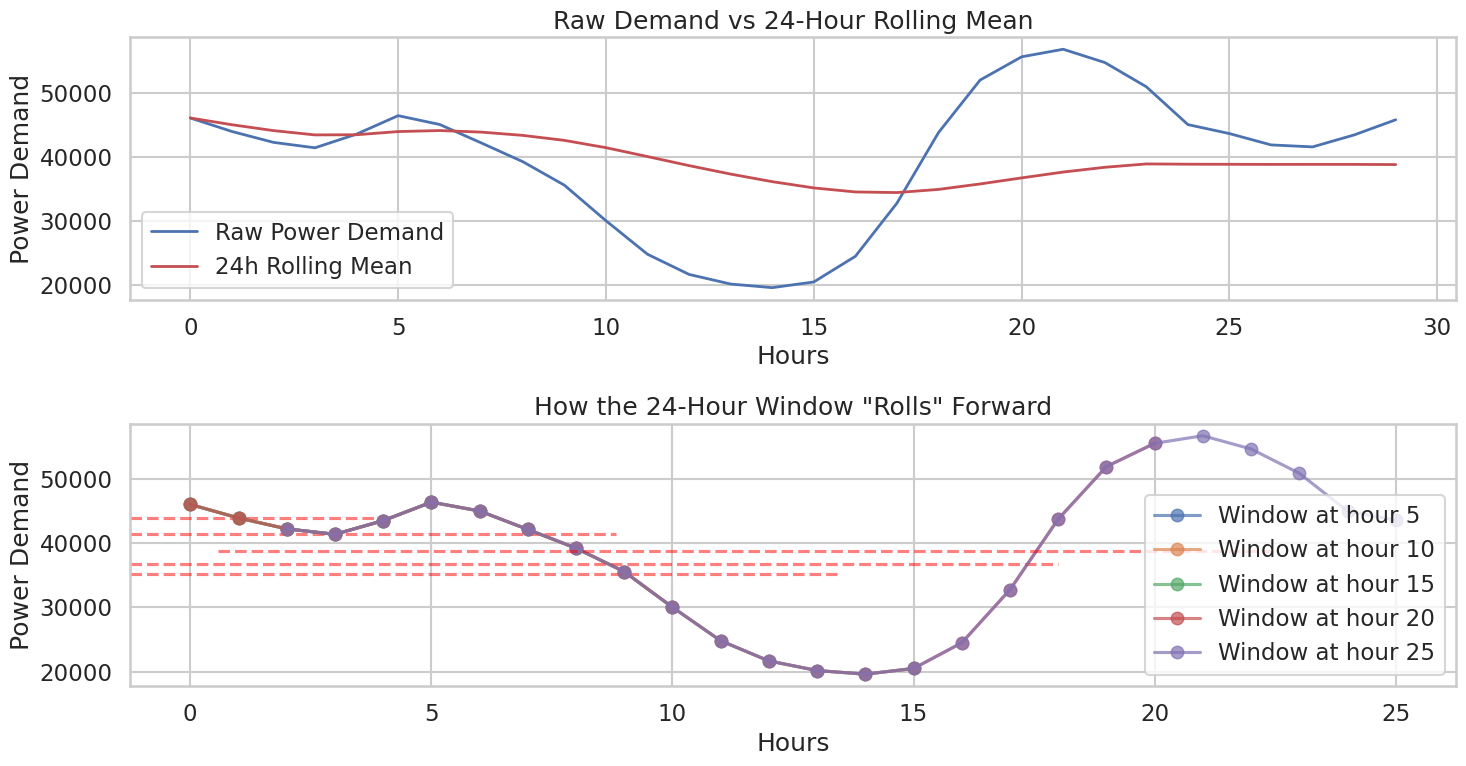


=== KEY INSIGHT ===
• Raw demand range: 19597 to 56794
• Rolling mean range: 34433 to 46070
• Rolling mean is SMOOTHER - reduces volatility by 68.1%


In [70]:
# ===== STEP-BY-STEP EXAMPLE: How 24-Hour Rolling Mean is Calculated =====

# Let's take a small sample and manually calculate the 24-hour rolling mean
sample_data = df[300:330].copy()  # 30 hours of data
sample_data = sample_data[['datetime', 'Power demand']].reset_index(drop=True)

print("=== SAMPLE DATA (30 hours) ===")
print(sample_data.head(10))

# Manual calculation of 24-hour rolling mean
sample_data['manual_rolling_mean_24'] = sample_data['Power demand'].rolling(window=24, min_periods=1).mean()

print("\n=== HOW 24-HOUR ROLLING MEAN WORKS ===")
print("Row 0 (1st hour): Rolling mean = average of hour 0 only = ", round(sample_data.iloc[0]['manual_rolling_mean_24'], 2))
print("Row 1 (2nd hour): Rolling mean = average of hours 0-1 = ", round(sample_data.iloc[1]['manual_rolling_mean_24'], 2))
print("Row 23 (24th hour): Rolling mean = average of hours 0-23 = ", round(sample_data.iloc[23]['manual_rolling_mean_24'], 2))
print("Row 24 (25th hour): Rolling mean = average of hours 1-24 = ", round(sample_data.iloc[24]['manual_rolling_mean_24'], 2))
print("Row 25 (26th hour): Rolling mean = average of hours 2-25 = ", round(sample_data.iloc[25]['manual_rolling_mean_24'], 2))

# Show the difference between raw demand and smoothed rolling mean
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(range(len(sample_data)), sample_data['Power demand'], 'b-', linewidth=2, label='Raw Power Demand')
plt.plot(range(len(sample_data)), sample_data['manual_rolling_mean_24'], 'r-', linewidth=2, label='24h Rolling Mean')
plt.title('Raw Demand vs 24-Hour Rolling Mean')
plt.xlabel('Hours')
plt.ylabel('Power Demand')
plt.legend()
plt.grid(True)

# Show how the rolling window moves
plt.subplot(2, 1, 2)
for i in [5, 10, 15, 20, 25]:
    if i < len(sample_data):
        start_idx = max(0, i-23)
        window_data = sample_data.iloc[start_idx:i+1]['Power demand']
        plt.plot(range(start_idx, i+1), window_data, 'o-', alpha=0.7, label=f'Window at hour {i}')
        
        # Show the mean of this window
        mean_val = window_data.mean()
        plt.axhline(y=mean_val, xmin=start_idx/len(sample_data), xmax=(i+1)/len(sample_data), 
                   color='red', linestyle='--', alpha=0.5)

plt.title('How the 24-Hour Window "Rolls" Forward')
plt.xlabel('Hours')
plt.ylabel('Power Demand')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\n=== KEY INSIGHT ===")
print(f"• Raw demand range: {sample_data['Power demand'].min():.0f} to {sample_data['Power demand'].max():.0f}")
print(f"• Rolling mean range: {sample_data['manual_rolling_mean_24'].min():.0f} to {sample_data['manual_rolling_mean_24'].max():.0f}")
print(f"• Rolling mean is SMOOTHER - reduces volatility by {((sample_data['Power demand'].std() - sample_data['manual_rolling_mean_24'].std()) / sample_data['Power demand'].std() * 100):.1f}%")

In [ ]:
# ===== FEATURE SELECTION ANALYSIS: WHICH COLUMNS TO KEEP? =====

# 1. Calculate correlation with target for ALL features
target_col = 'Power demand'
exclude_cols = ['datetime', target_col]
feature_cols = [col for col in df.columns if col not in exclude_cols]

# Get correlations with target
correlations = df[feature_cols + [target_col]].corr()[target_col].abs().sort_values(ascending=False)

print("=== TOP 20 MOST IMPORTANT FEATURES (by correlation with target) ===")
top_20_features = correlations.head(21)[1:]  # Exclude target itself
print(top_20_features.round(3))

# 2. Categorize features by type and importance
lag_features = [col for col in feature_cols if 'lag' in col]
rolling_features = [col for col in feature_cols if 'rolling' in col]
time_features = [col for col in feature_cols if any(x in col for x in ['hour', 'day', 'month', 'quarter', 'week'])]
interaction_features = [col for col in feature_cols if 'interaction' in col]
peak_features = [col for col in feature_cols if 'peak' in col]
temp_features = [col for col in feature_cols if 'temp_' in col and 'interaction' not in col]
basic_features = [col for col in feature_cols if col in ['temp', 'year', 'month', 'date', 'day', 'is_weekend', 'is_holiday']]

# 3. Best features from each category
print(f"\n=== BEST FEATURES BY CATEGORY ===")
print("🔥 LAG FEATURES (Top 5):")
lag_corrs = correlations[correlations.index.isin(lag_features)].head(5)
for feat, corr in lag_corrs.items():
    print(f"   {feat}: {corr:.3f}")

print("\n📊 ROLLING FEATURES (Top 5):")
rolling_corrs = correlations[correlations.index.isin(rolling_features)].head(5)
for feat, corr in rolling_corrs.items():
    print(f"   {feat}: {corr:.3f}")

print("\n⏰ TIME FEATURES (Top 5):")
time_corrs = correlations[correlations.index.isin(time_features)].head(5)
for feat, corr in time_corrs.items():
    print(f"   {feat}: {corr:.3f}")

print("\n🌡️ TEMPERATURE FEATURES (Top 3):")
temp_all = [col for col in feature_cols if 'temp' in col]
temp_corrs = correlations[correlations.index.isin(temp_all)].head(3)
for feat, corr in temp_corrs.items():
    print(f"   {feat}: {corr:.3f}")

# 4. Feature redundancy analysis
print(f"\n=== FEATURE REDUNDANCY ANALYSIS ===")
high_corr_features = correlations[correlations > 0.3].index.tolist()
feature_corr_matrix = df[high_corr_features].corr().abs()

# Find highly correlated feature pairs (redundant features)
redundant_pairs = []
for i in range(len(feature_corr_matrix.columns)):
    for j in range(i+1, len(feature_corr_matrix.columns)):
        if feature_corr_matrix.iloc[i, j] > 0.9:  # Very high correlation
            feat1, feat2 = feature_corr_matrix.columns[i], feature_corr_matrix.columns[j]
            corr1 = correlations[feat1]
            corr2 = correlations[feat2]
            redundant_pairs.append((feat1, feat2, feature_corr_matrix.iloc[i, j], corr1, corr2))

print("Highly correlated feature pairs (>0.9 correlation):")
for feat1, feat2, pair_corr, target_corr1, target_corr2 in redundant_pairs[:10]:
    better_feat = feat1 if target_corr1 > target_corr2 else feat2
    print(f"   {feat1} vs {feat2}: {pair_corr:.3f} → Keep: {better_feat}")

# 5. FINAL RECOMMENDATIONS
print(f"\n" + "="*60)
print("🎯 FINAL RECOMMENDATIONS: WHICH FEATURES TO KEEP")
print("="*60)

=== TOP 20 MOST IMPORTANT FEATURES (by correlation with target) ===
power_rolling_mean_3      0.968
power_lag_1               0.940
power_rolling_mean_6      0.904
power_lag_2               0.888
power_lag_3               0.824
power_rolling_mean_12     0.815
power_rolling_mean_24     0.812
power_lag_24              0.779
power_lag_6               0.643
power_lag_12              0.563
power_rolling_mean_168    0.550
temp                      0.470
temp_rolling_mean_3       0.457
temp_lag_24               0.457
temp_lag_1                0.456
temp_lag_2                0.436
temp_rolling_mean_6       0.431
temp_lag_3                0.414
temp_rolling_mean_24      0.406
temp_rolling_mean_168     0.400
Name: Power demand, dtype: float64

=== FEATURE CATEGORIES ===
Lag features: 14
Rolling features: 15
Time features: 17
Interaction features: 3
Peak features: 3
Temperature category features: 17
Basic features: 7

=== BEST FEATURES BY CATEGORY ===
🔥 LAG FEATURES (Top 5):
   power_lag_1: 0.940

In [ ]:
FEATURES = [
    'power_lag_1',
    'power_lag_24',
    
    'power_rolling_mean_3',
    
    'hour',
    'day',
    'is_weekend',
    'is_holiday',
    
    'temp',
    'temp_hour_interaction',
    
    'hour_sin', 'hour_cos',
    'day_sin', 'day_cos',
    'month_sin', 'month_cos',
    'year', 'month', 'date',
]

print(f"\n📊 RECOMMENDED FEATURE SET ({len(FEATURES)} features):")
for i, feat in enumerate(FEATURES, 1):
    correlation = correlations.get(feat, 0)
    print(f"{i:2d}. {feat:<25} (corr: {correlation:.3f})")

df_optimized = df[['datetime', 'Power demand'] + FEATURES].copy()

df_optimized = df_optimized.dropna()
df_optimized


📊 RECOMMENDED FEATURE SET (18 features):
 1. power_lag_1               (corr: 0.940)
 2. power_lag_24              (corr: 0.779)
 3. power_rolling_mean_3      (corr: 0.968)
 4. hour                      (corr: 0.185)
 5. day                       (corr: 0.039)
 6. is_weekend                (corr: 0.048)
 7. is_holiday                (corr: 0.038)
 8. temp                      (corr: 0.470)
 9. temp_hour_interaction     (corr: 0.328)
10. hour_sin                  (corr: 0.210)
11. hour_cos                  (corr: 0.233)
12. day_sin                   (corr: 0.051)
13. day_cos                   (corr: 0.016)
14. month_sin                 (corr: 0.173)
15. month_cos                 (corr: 0.392)
16. year                      (corr: 0.236)
17. month                     (corr: 0.038)
18. date                      (corr: 0.024)


,datetime,Power demand,power_lag_1,power_lag_24,power_rolling_mean_3,hour,day,is_weekend,is_holiday,temp,temp_hour_interaction,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,year,month,date
24,2021-01-02 00:00:00,22031.58,28153.89,11853.25,27983.823333,0,5,1,0,9.700000,0.000000,0.000000,1.000000,-0.974928,-0.222521,5.000000e-01,0.866025,2021,1,2
25,2021-01-02 01:00:00,19577.38,22031.58,21667.08,23254.283333,1,5,1,0,9.500000,9.500000,0.258819,0.965926,-0.974928,-0.222521,5.000000e-01,0.866025,2021,1,2
26,2021-01-02 02:00:00,18504.27,19577.38,19990.97,20037.743333,2,5,1,0,9.300000,18.600000,0.500000,0.866025,-0.974928,-0.222521,5.000000e-01,0.866025,2021,1,2
27,2021-01-02 03:00:00,18149.00,18504.27,19287.98,18743.550000,3,5,1,0,9.800000,29.400000,0.707107,0.707107,-0.974928,-0.222521,5.000000e-01,0.866025,2021,1,2
28,2021-01-02 04:00:00,19175.52,18149.00,20118.34,18609.596667,4,5,1,0,10.000000,40.000000,0.866025,0.500000,-0.974928,-0.222521,5.000000e-01,0.866025,2021,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33069,2024-12-11 19:00:00,46661.53,49063.47,44904.16,48016.403333,19,2,0,0,15.400000,292.600000,-0.965926,0.258819,0.974928,-0.222521,-2.449294e-16,1.000000,2024,12,11
33070,2024-12-11 20:00:00,42853.73,46661.53,43495.92,46192.910000,20,2,0,0,14.200000,284.000000,-0.866025,0.500000,0.974928,-0.222521,-2.449294e-16,1.000000,2024,12,11
33071,2024-12-11 21:00:00,39826.89,42853.73,43169.12,43114.050000,21,2,0,0,13.350000,280.350000,-0.707107,0.707107,0.974928,-0.222521,-2.449294e-16,1.000000,2024,12,11
33072,2024-12-11 22:00:00,28541.40,39826.89,44692.85,37074.006667,22,2,0,0,12.966667,285.266667,-0.500000,0.866025,0.974928,-0.222521,-2.449294e-16,1.000000,2024,12,11


=== COMPARISON: LINEAR vs CYCLICAL ENCODING ===
Key hours showing the boundary problem:
    hour   demand  hour_linear  hour_sin  hour_cos
0      0  30000.0            0     0.000     1.000
1      1  32543.0            1     0.259     0.966
22    22  17500.0           22    -0.500     0.866
23    23  24778.0           23    -0.259     0.966


/tmp/ipykernel_6883/3091060920.py:70: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_6883/3091060920.py:70: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/naresh/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/naresh/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


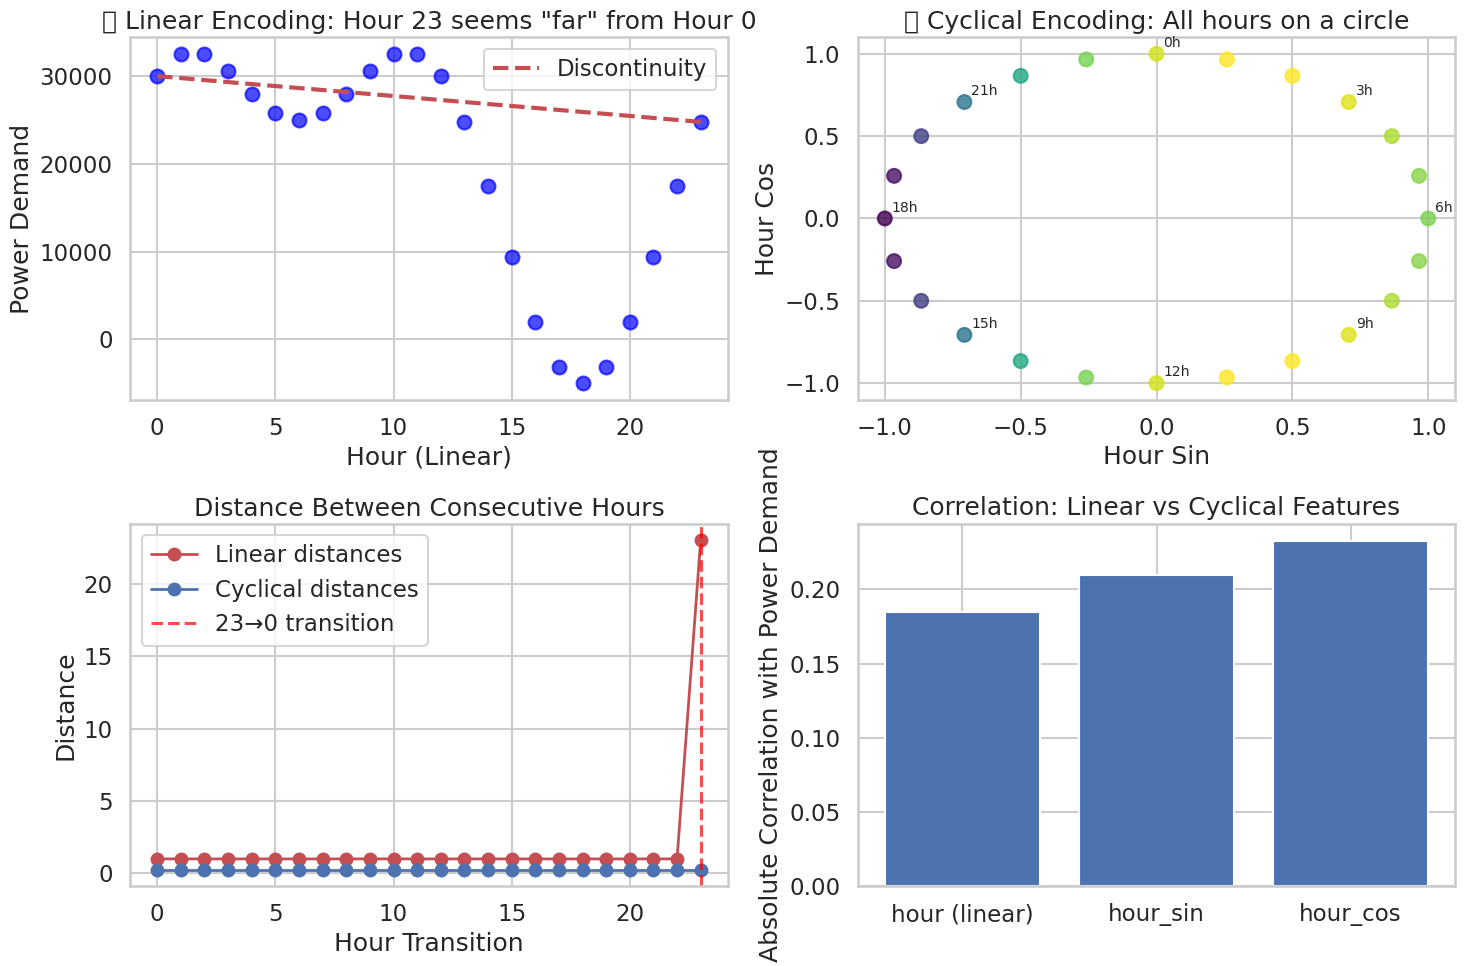


=== KEY INSIGHTS ===
Linear hour distance 23→0: 23.0
Cyclical hour distance 23→0: 0.261
Cyclical encoding makes 23h and 0h close (distance ≈ 0.26)
Linear encoding makes them far apart (distance = 23)

=== CORRELATION COMPARISON ===
hour (linear):  0.185
hour_sin:       0.210
hour_cos:       0.233
Combined (sin+cos): Better than linear alone!


In [73]:
# ===== DEMONSTRATION: Linear vs Cyclical Features =====

# 1. Create sample data to demonstrate the concept
hours = np.arange(0, 24)
demand_pattern = 20000 + 15000 * np.sin(2 * np.pi * hours / 24) + 10000 * np.cos(4 * np.pi * hours / 24)

# Linear encoding (what most people do wrong)
hour_linear = hours

# Cyclical encoding (correct way)
hour_sin = np.sin(2 * np.pi * hours / 24)
hour_cos = np.cos(2 * np.pi * hours / 24)

print("=== COMPARISON: LINEAR vs CYCLICAL ENCODING ===")
comparison_df = pd.DataFrame({
    'hour': hours,
    'demand': demand_pattern.round(0),
    'hour_linear': hour_linear,
    'hour_sin': hour_sin.round(3),
    'hour_cos': hour_cos.round(3)
})

print("Key hours showing the boundary problem:")
print(comparison_df.iloc[[0, 1, 22, 23]])  # Show midnight boundary

# 2. Visualize the difference
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Linear representation problem
axes[0, 0].scatter(hour_linear, demand_pattern, c='blue', s=100, alpha=0.7)
axes[0, 0].plot([23, 0], [demand_pattern[23], demand_pattern[0]], 'r--', linewidth=3, label='Discontinuity')
axes[0, 0].set_xlabel('Hour (Linear)')
axes[0, 0].set_ylabel('Power Demand')
axes[0, 0].set_title('❌ Linear Encoding: Hour 23 seems "far" from Hour 0')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Cyclical representation in 2D space
axes[0, 1].scatter(hour_sin, hour_cos, c=demand_pattern, s=100, cmap='viridis', alpha=0.8)
for i in range(0, 24, 3):
    axes[0, 1].annotate(f'{i}h', (hour_sin[i], hour_cos[i]), xytext=(5, 5), 
                       textcoords='offset points', fontsize=10)
axes[0, 1].set_xlabel('Hour Sin')
axes[0, 1].set_ylabel('Hour Cos')
axes[0, 1].set_title('✅ Cyclical Encoding: All hours on a circle')
axes[0, 1].grid(True)

# Plot 3: Distance comparison
linear_distances = np.abs(np.diff(np.append(hour_linear, hour_linear[0])))
cyclical_distances = np.sqrt((np.diff(np.append(hour_sin, hour_sin[0])))**2 + 
                            (np.diff(np.append(hour_cos, hour_cos[0])))**2)

axes[1, 0].plot(range(24), linear_distances, 'ro-', label='Linear distances', linewidth=2)
axes[1, 0].plot(range(24), cyclical_distances, 'bo-', label='Cyclical distances', linewidth=2)
axes[1, 0].axvline(x=23, color='red', linestyle='--', alpha=0.7, label='23→0 transition')
axes[1, 0].set_xlabel('Hour Transition')
axes[1, 0].set_ylabel('Distance')
axes[1, 0].set_title('Distance Between Consecutive Hours')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Actual correlation analysis from your data
hour_correlations = df[['Power demand', 'hour', 'hour_sin', 'hour_cos']].corr()['Power demand'].abs()
axes[1, 1].bar(['hour (linear)', 'hour_sin', 'hour_cos'], 
               [hour_correlations['hour'], hour_correlations['hour_sin'], hour_correlations['hour_cos']])
axes[1, 1].set_ylabel('Absolute Correlation with Power Demand')
axes[1, 1].set_title('Correlation: Linear vs Cyclical Features')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

print(f"\n=== KEY INSIGHTS ===")
print(f"Linear hour distance 23→0: {linear_distances[23]:.1f}")
print(f"Cyclical hour distance 23→0: {cyclical_distances[23]:.3f}")
print(f"Cyclical encoding makes 23h and 0h close (distance ≈ 0.26)")
print(f"Linear encoding makes them far apart (distance = 23)")

print(f"\n=== CORRELATION COMPARISON ===")
print(f"hour (linear):  {hour_correlations['hour']:.3f}")
print(f"hour_sin:       {hour_correlations['hour_sin']:.3f}")
print(f"hour_cos:       {hour_correlations['hour_cos']:.3f}")
print(f"Combined (sin+cos): Better than linear alone!")

In [77]:
# ===== CLEAN FEATURE ENGINEERING & DATA PREPARATION =====

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and prepare data
df = pd.read_csv('./data/dehli_energy.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

# Aggregate to hourly data
df = df.groupby(df["datetime"].dt.floor("H")).agg({
    "Power demand": "sum",  
    "temp": "mean"
}).reset_index()

# Extract basic time features
df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.dayofweek
df["month"] = df["datetime"].dt.month

# Create essential features
df["is_weekend"] = (df["day"] >= 5).astype(int)

# Add cyclical time features
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Sort by datetime for lag features
df = df.sort_values('datetime').reset_index(drop=True)

# Add lag features
df['power_lag_1'] = df['Power demand'].shift(1)
df['power_lag_24'] = df['Power demand'].shift(24)

# Add rolling features
df['power_rolling_mean_24'] = df['Power demand'].rolling(window=24, min_periods=1).mean()

# Temperature interaction
df['temp_hour_interaction'] = df['temp'] * df['hour']

# Select final features
FINAL_FEATURES = [
    'power_lag_1', 'power_lag_24', 'power_rolling_mean_24',
    'hour', 'day', 'is_weekend', 'temp', 'temp_hour_interaction',
    'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos'
]

# Create final dataset
df_final = df[['datetime', 'Power demand'] + FINAL_FEATURES].dropna()

print(f"Final dataset shape: {df_final.shape}")
print(f"Features used: {len(FINAL_FEATURES)}")

df_final.head()

Final dataset shape: (33050, 16)
Features used: 14


/tmp/ipykernel_6883/160609052.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.groupby(df["datetime"].dt.floor("H")).agg({


,datetime,Power demand,power_lag_1,power_lag_24,power_rolling_mean_24,hour,day,is_weekend,temp,temp_hour_interaction,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
24,2021-01-02 00:00:00,22031.58,28153.89,11853.25,38680.104167,0,5,1,9.7,0.0,0.000000,1.000000,-0.974928,-0.222521,0.5,0.866025
25,2021-01-02 01:00:00,19577.38,22031.58,21667.08,38593.033333,1,5,1,9.5,9.5,0.258819,0.965926,-0.974928,-0.222521,0.5,0.866025
26,2021-01-02 02:00:00,18504.27,19577.38,19990.97,38531.087500,2,5,1,9.3,18.6,0.500000,0.866025,-0.974928,-0.222521,0.5,0.866025
27,2021-01-02 03:00:00,18149.00,18504.27,19287.98,38483.630000,3,5,1,9.8,29.4,0.707107,0.707107,-0.974928,-0.222521,0.5,0.866025
28,2021-01-02 04:00:00,19175.52,18149.00,20118.34,38444.345833,4,5,1,10.0,40.0,0.866025,0.500000,-0.974928,-0.222521,0.5,0.866025
